In [ ]:
import matplotlib.pyplot as plt

INF = 2147483647
NP = -1
A = 0; B = 1; C = 2; D = 3; E = 4
N = 5

start = B
goal = B
step = 7

# A, B, C, D, E distance
dist = [
	[2, 2, INF, INF, INF],
	[INF, INF, INF, 4, INF],
	[1, INF, INF, 1, INF],
	[INF, INF, 1, INF, 1],
	[INF, INF, INF, INF, INF]
]

def cvt_state(state):
	if state == A:
		return "A"
	elif state == B:
		return "B"
	elif state == C:
		return "C"
	elif state == D:
		return "D"
	elif state == E:
		return "E"
	elif state == INF:
		return "fin"
	else:
		return "-"

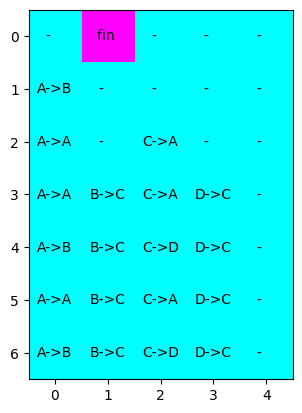

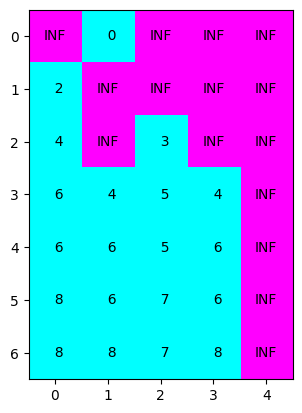

In [25]:
# backward value iteration

table = [[INF for _ in range(N)] for _ in range(step)]
cache = [[NP for _ in range(N)] for _ in range(step)]

table[0][goal] = 0
cache[0][goal] = INF

for i in range(1, step):
	for j in range(N):
		for k in range(N):
			if (dist[k][j] != INF and table[i-1][j] != INF):
				if table[i][k] > table[i-1][j] + dist[k][j]:
					cache[i][k] = j
					table[i][k] = table[i-1][j] + dist[k][j]

fig, ax = plt.subplots()

plt.imshow(cache, cmap='cool', interpolation='nearest')
for i in range(step):
	for j in range(N):
		prev = cvt_state(j)
		after = cvt_state(cache[i][j])
		if cache[i][j] == INF or cache[i][j] == NP:
			tempstr = "{:4}".format(after)
		else:
			tempstr = "{:4}".format(prev + "->" + after)
		text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
plt.show()

fig, ax = plt.subplots()
plt.imshow(table, cmap='cool', interpolation='nearest')
for i in range(step):
	for j in range(N):
		tempstr = "{:3}".format("INF" if table[i][j]==INF else table[i][j])
		text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
plt.show()

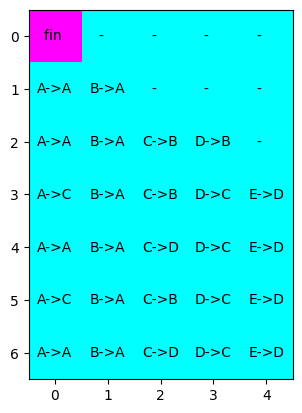

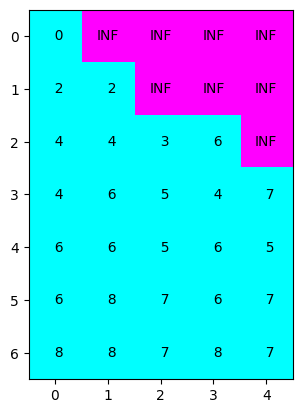

In [ ]:
# forward value iteration
table = [[INF for _ in range(N)] for _ in range(step)]
cache = [[NP for _ in range(N)] for _ in range(step)]

table[0][start] = 0
cache[0][start] = INF

for i in range(1, step):
	for j in range(N):
		for k in range(N):
			if (dist[j][k] != INF and table[i-1][j] != INF):
				if table[i][k] > table[i-1][j] + dist[j][k]:
					cache[i][k] = j
					table[i][k] = table[i-1][j] + dist[j][k]

fig, ax = plt.subplots()
plt.imshow(cache, cmap='cool', interpolation='nearest')
for i in range(step):
	for j in range(N):
		prev = cvt_state(j)
		after = cvt_state(cache[i][j])
		if cache[i][j] == INF or cache[i][j] == NP:
			tempstr = "{:4}".format(after)
		else:
			tempstr = "{:4}".format(prev + "->" + after)
		text = ax.text(j, i, tempstr, ha="center", va="center", color="k")

plt.show()

fig, ax = plt.subplots()
plt.imshow(table, cmap='cool', interpolation='nearest')
for i in range(step):
	for j in range(N):
		tempstr = "{:3}".format("INF" if table[i][j]==INF else table[i][j])
		text = ax.text(j, i, tempstr, ha="center", va="center", color="k")

plt.show()
